## СОДЕРЖАНИЕ
<br>
1. Введение
<br>
    1.1. Актуальность проблемы коррупции в современном обществе
    <br>
    1.2. Цели и задачи исследования
    <br><br>
2. Описание набора данных и решаемой задачи<br>
    2.1. Источники данных: (Следственный Комитет, Госслужба РФ)   <br>
    2.2. Сбор данных Следственных Комитетов<br>
    2.3. Структура данных и их физический смысл   <br>
    2.4. Целевая переменная и задача машинного обучения
    <br><br>
3. Предварительный анализ и очистка данных<br>
    3.1. Обзор количественных характеристик набора данных<br>
    3.3. Анализ отсутствующих значений<br>
<br>
4. Преобразование атрибутов в числовые признаки<br>
    4.1. Векторизация текстовых данных<br>
    4.2. Преобразование даты в числовой формат<br>
    4.3. Извлечение дополнительных признаков<br>
<br>
5. Описательный анализ данных<br>
    5.1. Определение шкалы измерения каждого признака<br>
    5.2. Выявление аномальных значений<br>
    5.3. Визуализация распределения признаков<br>
    5.4. Построение кореллограмм<br>
<br>
6. Применение методов обучения без учителя<br>
    6.1. Кластеризация текстов<br>
    6.2. Понижение размерности данных<br>
    6.3. Поиск аномалий<br>
<br>
7. Разделение набора данных на обучающую и тестовую выборки<br>
    7.1. Обоснование метода разделения данных<br>
    7.2. Количественные характеристики выборок<br>
<br>
8. Обучение моделей для решения задачи<br>
    8.1. Обзор различных алгоритмов машинного обучения<br>
    8.2. Анализ результатов обучения<br>
    8.3. Сравнение производительности моделей<br>
<br>
9. Выбор наиболее перспективной модели<br>
    9.1. Изменение гиперпараметров модели<br>
    9.2. Проведение Grid Search для поиска оптимальных гиперпараметров<br>
<br>
10. Усовершенствование моделей<br>
    10.1. Введение регуляризации<br>
    10.2. Изменение параметров модели<br>
    10.3. Отбор признаков<br>
    10.4. Нормализация данных<br>
    10.5. Ансамблирование моделей
<br><br>
11. Предобработка данных для повышения эффективности модели<br>
    11.1. Изменение порядка предобработки данных<br>
    11.2. Применение понижения размерности для создания суррогатных признаков<br>
<br>
12. Представление результатов моделирования<br>
    12.1. Графики и диаграммы<br>
    12.2. Сравнение моделей и анализ результатов<br>
    12.3. Сопоставление с существующими аналогичными решениями<br>
    12.4. Рассмотрение перспектив решения проблемы коррупции<br>
<br>
13. Заключение<br>
    13.1. Основные выводы и результаты исследования<br>
    13.2. Перспективы дальнейших исследований<br>
<br>
14. Список использованных источников

## 1. Введение
### 1.1. Актуальность проблемы коррупции в современном обществе
### 1.2. Цели и задачи исследования

## 2. Описание набора данных и решаемой задачи
### 2.1. Источники данных: (Следственный Комитет, Госслужба РФ)

### 2.2. Сбор данных

In [4]:
!pip install --upgrade certifi

In [5]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [6]:
import certifi
print(certifi.where())

C:\Users\remote\anaconda3\Lib\site-packages\certifi\cacert.pem


In [7]:
import os
os.environ['SSL_CERT_FILE'] = '/path/to/ca-certificates.crt'

Соберем данные с сайта следственного комитета РФ. Этот сайт отличается от типовых сайтов регионов разметкой и количеством предоставляемых параметров. По этой причине на нем отрабатывался код для сборщика данных, который был вынесен в отдельную функцию ниже. 

In [ ]:
# Function to scrape data from a single page
def scrape_page(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    links = soup.select('div.news-item__title a[href]')
    return [link['href'] for link in links]

# Function to iterate over the pagination and scrape data from all pages
def scrape_all_pages(base_url, num_pages):
    all_links = []
    for i in range(1, num_pages+1):
        url = base_url.replace('news/2', f'news/{i}')
        links = scrape_page(url)
        all_links.extend(links)
    return all_links

# Base url of the main RF page
base_url = "https://sledcom.ru/news/2/?to=01.02.2029&from=01.02.2020&type=corrupt&dates=01.02.2020%20-%2001.02.2029"

# Number of pages in the pagination 
# ToDo: Fetch by tag/id/class
num_pages = 66

# Scrape data from all pages
all_links = scrape_all_pages(base_url, num_pages)

In [ ]:
# Create an empty list to store the parsed data
parsed_data = []

# Fetch HTML from each link and parse the data
for link in all_links:
    url = "https://sledcom.ru/"+link
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    # Extracting the data
    try:
        topic = soup.find('div', class_='news-card__topic').text.strip()
    except AttributeError:
        topic = 'N/A'

    try:
        card_title = soup.find('div', class_='news-card__title-text').text.strip()
    except AttributeError:
        card_title = 'N/A'

    tags = [tag.text for tag in soup.find_all('a', href=lambda href: href and '/tags/item' in href)]

    try:
        date = soup.find('div', class_='news-card__data').text.strip()
    except AttributeError:
        date = 'N/A'

    try:
        card_text = soup.find('div', class_='news-card__text').text.strip()
    except AttributeError:
        card_text = 'N/A'

    # Append the extracted data to the parsed_data list
    parsed_data.append({'Link': link, 'Topic': topic, 'Card Title': card_title, 'Tags': tags, 'Date': date, 'Card Text': card_text})

# Create a DataFrame from the parsed data
df = pd.DataFrame(parsed_data)

In [92]:
df

,Link,Topic,Card Title,Tags,Date,Card Text
0,/news/item/1852271/,Кемеровская область - Кузбасс,В Кемеровской области – Кузбассе перед судом п...,"[деньги,, должностные преступления,, мошенниче...",11 Января 2024,Следственными органами Следственного комитета ...
1,/news/item/1850441/,Костромская область,В Костромской области перед судом предстанет б...,"[взятка,, деньги,, коррупция]",30 Декабря 2023,Следственными органами Следственного комитета ...
2,/news/item/1850234/,Пензенская область,Бывший министр физической культуры и спорта Пе...,"[взятка,, деньги,, коррупция,, лишение свободы...",29 Декабря 2023,"Доказательства, собранные следственными органа..."
3,/news/item/1848538/,Амурская область,В Амурской области генеральный директор строит...,"[деньги,, лишение свободы,, мошенничество,, пр...",25 Декабря 2023,Собранные следственнными органами следственног...
4,/news/item/1848505/,Хабаровский край и Еврейская АО,Заместитель министра транспорта Хабаровского к...,"[взятка,, коррупция,, обвинение]",25 Декабря 2023,Следственными органами Следственного комитета ...
...,...,...,...,...,...,...
15,/news/item/1875959/,N/A,На Северном Кавказе возбуждено уголовное дело ...,"[взятка,, ГСУ СКР по СКФО,, МВД]",16 Апреля 2024,Главным следственным управлением СК России по ...
16,/news/item/1874731/,Самарская область,В отношении руководителя департамента градостр...,"[взятка,, обвинение,, посредничество]",11 Апреля 2024,Следственными органами Следственного комитета ...
17,/news/item/1873897/,Восточное МСУТ,В Красноярске осужден бывший заместитель начал...,[взятка],08 Апреля 2024,Собранные следственными органами Восточного МС...
18,/news/item/1872805/,Астраханская область,В Астраханской области завершено расследование...,"[взятка,, деньги,, злоупотребление полномочиям...",03 Апреля 2024,Следственными органами следственного управлени...


In [97]:
# Save the DataFrame to a CSV file
df.to_csv('data_RF.csv', index=False)

Был написан от отработан сборщик для типовых страниц. Один для страниц, где есть пагинация, и другой без. В процессе было обнаружено, что все подразделения следственных комитетов не включают в состав докладов о престеплениях год публикаций, а некоторые включают в публикации повторяющиеся данные, типа ссылок на страницы комитетов и социальные сети регионов. Помимо этого, данные в докладах оказались в своей общности разнородными по методу предоставления данных и приверженности маркировке данных, которые являются целевыми для исследования.<br><br>На этом этапе исследования было принято решение уделить бОльшее внимание предобработке данных, чем посроению моделей, ввиду структуры первоисточников.

In [6]:
def scrapper(source, news_url, region):

    url = source.format(1)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    div_tags = soup.find_all('div', class_='b-pagination')
    a_tags = div_tags[0].find_all('a')
    number_of_pages=int(a_tags[-2].text)

    parsed_data = []
    links = [] 
    dates = [] #Fix for sledcom not storing year of the article's publication in the article. 

    for page in range(1, number_of_pages+1):  # Loop through pagination
        url = source.format(page)
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            links.extend([a['href'] for a in soup.find_all('a', href=lambda href: href and '/news/item/' in href)])
            dates.extend([div.get_text() for div in soup.find_all('div',class_="bl-item-date")])
        else:
            print(f"Failed to fetch page {page}")
    
    for idx, link in enumerate(list(set(links))):
        url = news_url + link
        response = requests.get(url)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')

        topic = region

        try:
            card_title = soup.find('h1', class_='b-topic').text.strip()
        except AttributeError:
            card_title = 'N/A'

        tags = [tag.text for tag in soup.find_all('a', href=lambda href: href and '/tags/item' in href)]

#        Use this if article page stores years in the attribute.
#        try:
#            date = soup.find('div', class_='bl-item-date').text.strip()
#        except AttributeError:
#            date = 'N/A'
        date = dates[idx]

        try:
            card_text = soup.find('article', class_='c-detail').text.strip()
        except AttributeError:
            card_text = 'N/A'

        parsed_data.append({'Link': link, 'Topic': topic, 'Card Title': card_title, 'Tags': tags, 'Date': date, 'Card Text': card_text})

    return parsed_data

In [ ]:
def scrapper_single_page(url, region):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

Сайты следственных комитетов, помимо федерального (sledcom.ru) делятся на девять условных округов, в которых суммарно находятся восемьдесят-девять сайтов комитетов субъектов россии, включая комитеты новых регионов, вошедших в состав РФ.

In [138]:
urls = [
#    "http://tula.sledcom.ru/", http error
#    "http://kuban.sledcom.ru/", http
#    "http://mari.sledcom.ru/", http
#    "http://vologda.sledcom.ru/", http
#    "http://omsk.sledcom.ru/", response error

#    "http://baikonur.sledcom.ru/", index
#    "http://arh.sledcom.ru/", index
#    "http://vnovgorod.sledcom.ru/", idx
#    "http://amur.sledcom.ru/", idx
#    "https://dnr.sledcom.ru/", idx
#    "https://lnr.sledcom.ru/", idx
#    "https://kherson.sledcom.ru/", idx
#    "https://zaporozhye.sledcom.ru/" idx
    
#    "http://samara.sledcom.ru/", dates idx out of bounds (weird)
]

third_level_domains = []

for url in urls:
    # Split the URL by '.' and take the third element
    third_level_domain = url.split('.')[0]
    third_level_domain = third_level_domain[7:].replace("/", "")
    third_level_domains.append(third_level_domain)
    
print(third_level_domains)

['zaporozhye']


In [ ]:
for region in third_level_domains:
    print("http://"+region+".sledcom.ru/news/{0}/?year=&month=&day=&type=corrupt",
                    "http://"+region+".sledcom.ru",region)
    data = scrapper("http://"+region+".sledcom.ru/news/{0}/?year=&month=&day=&type=corrupt",
                    "http://"+region+".sledcom.ru",region)
    df = pd.DataFrame(data)
    df.to_csv('../PyNotebooks/data_'+region+'.csv', index=False)

### 2.3. Структура данных и их физический смысл

### 2.4. Целевая переменная и задача машинного обучения

## 3. Предварительный анализ и очистка данных

### 3.1. Обзор количественных характеристик набора данных

In [12]:
# Let's collect all data into one huge data-frame.

# Folder path
folder_path = '../PyNotebooks/'

# Get a list of all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Create an empty DataFrame to store the merged data
merged_data = pd.DataFrame()

#Use pandas concat() to merge the data
merged_data= pd.concat((pd.read_csv(filename) for filename in csv_files),ignore_index=True)

# Summary of the merged data
merged_data.describe()

,Link,Topic,Card Title,Tags,Date,Card Text
count,22784,22677,22784,22784,22784,22784
unique,22784,158,22070,2839,3432,22764
top,/news/item/1764152/,altai-krai,9 декабря – Международный день борьбы с корруп...,[],24 Апреля 2017,Следственными органами Следственного комитета ...
freq,1,1030,18,8828,274,2


In [14]:
merged_data

,Link,Topic,Card Title,Tags,Date,Card Text
0,/news/item/1764152/,adygheya,В отношении должностного лица возбуждено уголо...,"['взятка', 'должностное лицо']",28 Марта 2024,Следственным отделом по городу Майкоп следстве...
1,/news/item/1691367/,adygheya,Завершено расследование уголовного дела в отно...,['взятка'],22 Марта 2024,Отделом по расследованию особо важных дел след...
2,/news/item/1699190/,adygheya,В Адыгее в отношении судьи возбуждено уголовно...,"['взятка', 'судья']",28 Февраля 2024,Председателем Следственного комитета Российско...
3,/news/item/1501352/,adygheya,В Адыгее вынесен приговор в отношении бывшего ...,"['злоупотребление', 'приговор', 'присвоение', ...",16 Января 2024,Собранные следственным отделом по Майкопскому ...
4,/news/item/1701313/,adygheya,В Адыгее в отношении заведующего отделением и ...,['взятка'],23 Ноября 2023,Тахтамукайским межрайонным следственным отдело...
...,...,...,...,...,...,...
22779,/news/item/1656889/,zmsut,В Санкт-Петербурге местный житель признан вино...,['взятка'],24 Апреля 2017,"Доказательства, собранные следственными органа..."
22780,/news/item/1571478/,zmsut,К 7-ми годам лишения свободы и многомиллионном...,['взятка'],24 Апреля 2017,фото из открытых источников \n\n\nД...
22781,/news/item/1138237/,zmsut,В Москве возбуждено уголовное дело в отношении...,[],30 Декабря 2015,Следственными органами Московского межрегионал...
22782,/news/item/1345488/,zmsut,В Москве вынесен приговор бывшим сотрудникам т...,"['мошенничество', 'приговор']",28 Декабря 2015,фото из открытых источников \n\nСоб...


### 3.3. Анализ отсутствующих значений

Будет произведен уже после обработки данных в пункте 4 данной работы, так как для удобства анализа легче работать с числовыми признаками.<br>

In [18]:
merged_data.isnull().sum()

Link            0
Topic         107
Card Title      0
Tags            0
Date            0
Card Text       0
dtype: int64

In [20]:
merged_data[merged_data.isnull().any(axis=1)]

,Link,Topic,Card Title,Tags,Date,Card Text
13545,/news/item/1847044/,NaN,Главным следственным управлением СК России воз...,"['взятка,', 'ГСУ СКР,', 'МЧС']",18 Декабря 2023,Главным следственным управлением СК России воз...
13547,/news/item/1845453/,NaN,Перед судом предстанет бывший начальник подраз...,"['взятка,', 'ГСУ СКР по СКФО']",11 Декабря 2023,Главным следственным управлением Следственного...
13551,/news/item/1842537/,NaN,Вынесен приговор начальнику отдела Ространснад...,"['ГСУ СКР по СКФО,', 'коррупция,', 'приговор']",30 Ноября 2023,Собранные Главным следственным управлением Сле...
13553,/news/item/1841825/,NaN,Завершено расследование уголовного дела в отно...,"['взятка,', 'ГСУ СКР по СКФО']",27 Ноября 2023,Главным следственным управлением Следственного...
13556,/news/item/1838351/,NaN,Перед судом предстанет член преступной группы ...,"['ГСУ СКР по СКФО,', 'мошенничество']",14 Ноября 2023,Главным следственным управлением Следственного...
...,...,...,...,...,...,...
14175,/news/item/1871212/,NaN,Вынесен приговор бывшему замминистру энергетик...,"['приговор,', 'суд']",27 Марта 2024,"Доказательства, собранные Следственным комитет..."
14180,/news/item/1858785/,NaN,Перед судом предстанут бывшие командиры подраз...,"['взятка,', 'ГСУ СКР по СКФО,', 'полицейский,'...",06 Февраля 2024,Главным следственным управлением Следственного...
14181,/news/item/1855994/,NaN,Вынесен приговор бывшему губернатору Пензенско...,"['взятка,', 'ГСУ СКР,', 'лишение свободы,', 'п...",25 Января 2024,"Доказательства, собранные Главным следственным..."
14183,/news/item/1854537/,NaN,Вынесен приговор бывшему прокурору Новосибирск...,"['взятка,', 'ГСУ СКР,', 'прокурор']",19 Января 2024,"Доказательства, собранные Главным следственным..."


In [22]:
merged_data.loc[merged_data.isnull().any(axis=1), 'Topic'] = 'noregion'

In [24]:
merged_data.isnull().sum()

Link          0
Topic         0
Card Title    0
Tags          0
Date          0
Card Text     0
dtype: int64

### 3.4. Изучение физического смысла каждого атрибута данных

### 3.5. Выделение нескольких точек данных для иллюстрации структуры

In [28]:
merged_data.head

<bound method NDFrame.head of                       Link     Topic  \
0      /news/item/1764152/  adygheya   
1      /news/item/1691367/  adygheya   
2      /news/item/1699190/  adygheya   
3      /news/item/1501352/  adygheya   
4      /news/item/1701313/  adygheya   
...                    ...       ...   
22779  /news/item/1656889/     zmsut   
22780  /news/item/1571478/     zmsut   
22781  /news/item/1138237/     zmsut   
22782  /news/item/1345488/     zmsut   
22783  /news/item/1671189/     zmsut   

                                              Card Title  \
0      В отношении должностного лица возбуждено уголо...   
1      Завершено расследование уголовного дела в отно...   
2      В Адыгее в отношении судьи возбуждено уголовно...   
3      В Адыгее вынесен приговор в отношении бывшего ...   
4      В Адыгее в отношении заведующего отделением и ...   
...                                                  ...   
22779  В Санкт-Петербурге местный житель признан вино...   
22780  К 

## 4. Преобразование атрибутов в числовые признаки

In [ ]:
!pip3 install -U spacy
!pip3 install -U spacy-lookups-data
!spacy download ru_core_news_sm

### 4.1. Извлечение дополнительных признаков

In [33]:
!pip3 install regex

In [34]:
import regex as re

In [35]:
def extract_articles(text):
    features = {}

    # Статья УК РФ
    articles = re.findall(r'((?<=ст\.?\s?)\d+)|(?<=стать\w*\s+)(\d+)', text)
    features['articles'] = articles if articles else None
    
    return features

# Создание нового DataFrame с извлеченными параметрами
extracted_features = merged_data['Card Text'].apply(extract_articles)
features_df = pd.DataFrame(extracted_features.tolist())

# Function to clean up the data because I doubled back and forgot and I don't want to change the regex function.
def clean_articles(articles_list):
    if articles_list is None:
        return set()
    
    cleaned_articles = set()
    for article_tuple in articles_list:
        for article_id in article_tuple:
            if article_id!="" and len(article_id)==3:
                cleaned_articles.add(article_id)
    return cleaned_articles

# Clean up the 'articles' column
features_df['articles'] = features_df['articles'].apply(clean_articles)


# Объединение нового DataFrame с исходным
result_df = pd.concat([merged_data, features_df], axis=1)

In [36]:
result_df

,Link,Topic,Card Title,Tags,Date,Card Text,articles
0,/news/item/1764152/,adygheya,В отношении должностного лица возбуждено уголо...,"['взятка', 'должностное лицо']",28 Марта 2024,Следственным отделом по городу Майкоп следстве...,{290}
1,/news/item/1691367/,adygheya,Завершено расследование уголовного дела в отно...,['взятка'],22 Марта 2024,Отделом по расследованию особо важных дел след...,{290}
2,/news/item/1699190/,adygheya,В Адыгее в отношении судьи возбуждено уголовно...,"['взятка', 'судья']",28 Февраля 2024,Председателем Следственного комитета Российско...,{290}
3,/news/item/1501352/,adygheya,В Адыгее вынесен приговор в отношении бывшего ...,"['злоупотребление', 'приговор', 'присвоение', ...",16 Января 2024,Собранные следственным отделом по Майкопскому ...,"{285, 160}"
4,/news/item/1701313/,adygheya,В Адыгее в отношении заведующего отделением и ...,['взятка'],23 Ноября 2023,Тахтамукайским межрайонным следственным отдело...,{290}
...,...,...,...,...,...,...,...
22779,/news/item/1656889/,zmsut,В Санкт-Петербурге местный житель признан вино...,['взятка'],24 Апреля 2017,"Доказательства, собранные следственными органа...","{291, 183}"
22780,/news/item/1571478/,zmsut,К 7-ми годам лишения свободы и многомиллионном...,['взятка'],24 Апреля 2017,фото из открытых источников \n\n\nД...,{290}
22781,/news/item/1138237/,zmsut,В Москве возбуждено уголовное дело в отношении...,[],30 Декабря 2015,Следственными органами Московского межрегионал...,{204}
22782,/news/item/1345488/,zmsut,В Москве вынесен приговор бывшим сотрудникам т...,"['мошенничество', 'приговор']",28 Декабря 2015,фото из открытых источников \n\nСоб...,{159}


### 4.2. Векторизация текстовых данных

In [73]:
!pip install pymorphy3

In [75]:
!pip install pymorphy3-dicts-ru

In [10]:
#Download nltk packages if not already downloading
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\remote\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\remote\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
import pymorphy3
import nltk
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import string
from gensim.models.phrases import Phrases, Phraser
from gensim import corpora
from gensim import models
import numpy as np
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models import Doc2Vec

In [82]:
# Initialize morph analyzer and stop words
morph = pymorphy3.MorphAnalyzer()

tokenizer = RegexpTokenizer(r'\w+')

stop_words = set(stopwords.words('russian'))

newStopWords = ['следственный','комитет','российский','рф','федерация','«','»','']

# Function to lemmatize a text
def lemmatize_text(text):
    # Tokenize text
    tokens = [word for word in tokenizer.tokenize(text.lower())]
    # Filter out stopwords and punctuation symbols
    filtered_tokens = [word for word in tokens if (word.lower() not in stop_words 
                       and word not in string.punctuation
                       and not word.startswith('http')
                       and not re.search(r'\d', word))]
    # Lemmatize tokens
    lemmas = [morph.parse(token)[0].normal_form for token in filtered_tokens if token not in newStopWords]
    return lemmas

text = result_df["Card Text"].tolist()
title = result_df["Card Title"].tolist()

# Apply lemmatize_text function to each row in the "Card Text" column
text_lemmas = [lemmatize_text(doc) for doc in text]
title_lemmas = [lemmatize_text(doc) for doc in title]

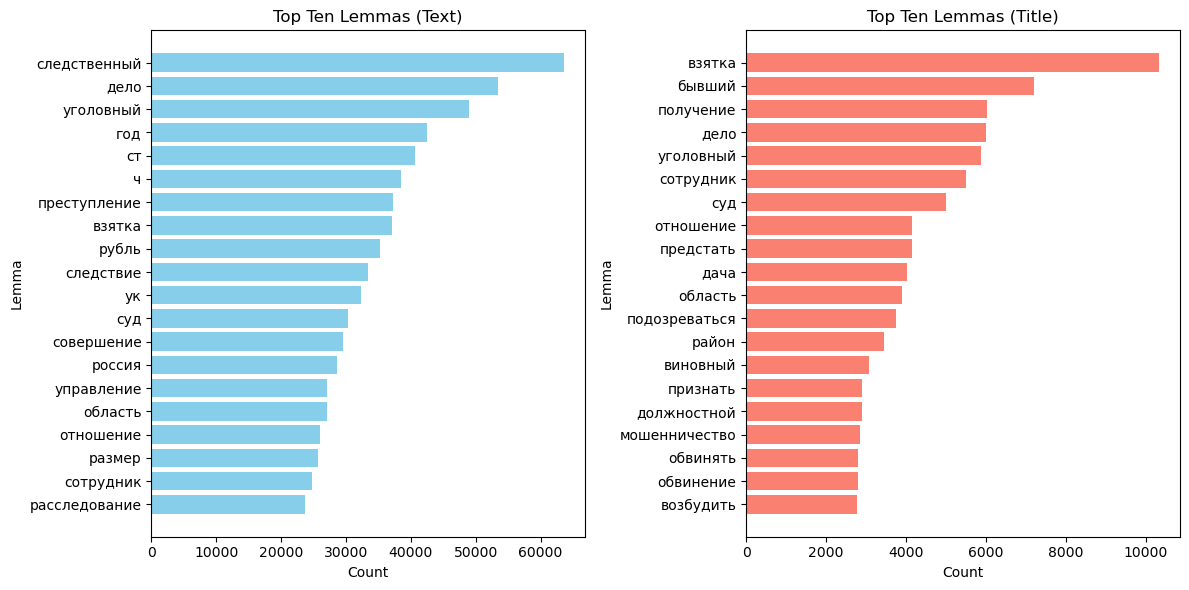

In [84]:
from collections import Counter

flat_list_of_txt_lemmas = [lemma for sublist in text_lemmas for lemma in sublist]
flat_list_of_ttl_lemmas = [lemma for sublist in title_lemmas for lemma in sublist]

txt_lemma_counts = Counter(flat_list_of_txt_lemmas)
ttl_lemma_counts = Counter(flat_list_of_ttl_lemmas)

top_txt = dict(txt_lemma_counts.most_common(20))
top_ttl = dict(ttl_lemma_counts.most_common(20))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(list(top_txt.keys()), list(top_txt.values()), color='skyblue')
plt.xlabel('Count')
plt.ylabel('Lemma')
plt.title('Top Ten Lemmas (Text)')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(list(top_ttl.keys()), list(top_ttl.values()), color='salmon')
plt.xlabel('Count')
plt.ylabel('Lemma')
plt.title('Top Ten Lemmas (Title)')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

После подбора параметров очистки, аномальных значений нет. Необходимость фильтрации сокращений и именованных сущностей пока не ясна и требует экспериментов. С другой стороны, совместное использование и титула и корпуса текстов могут привести к более сбалансированной матрице для корпуса текстов. Для начала, приведем лемматизированные документы к матричному виду и заодно проверим модель LDA, на предмет выделения тем.

In [89]:
import pickle
#Pickling
with open("text_lemmas", "wb") as fp:   
    pickle.dump(text_lemmas, fp)
with open("title_lemmas", "wb") as fp:   
    pickle.dump(title_lemmas, fp)

Выделим n-граммы для контекстного анализа.

In [95]:
## Find all bigrams in the collection
text_bigrams = Phrases(text_lemmas, min_count=1, threshold=5) 
title_bigrams = Phrases(title_lemmas, min_count=1, threshold=5)
## Find all trigrams in the collection
text_trigrams = Phrases(text_bigrams[text_lemmas], min_count=2, threshold=5) 
title_trigrams = Phrases(text_bigrams[title_lemmas], min_count=2, threshold=5) 
## Set up parser for bigrams
text_bigram_phraser = Phraser(text_bigrams) 
title_bigram_phraser = Phraser(title_bigrams)
## Set up parser for trigrams
text_trigram_phraser = Phraser(text_trigrams) 
title_trigram_phraser = Phraser(title_trigrams) 

doc_texts=[]
for doc in text_lemmas:
    doc_texts.append(text_trigram_phraser[text_bigram_phraser[doc]])
doc_titles=[]
for doc in title_lemmas:
    doc_titles.append(title_trigram_phraser[title_bigram_phraser[doc]])

Создаем словарь слов.

In [97]:
text_dictionary = corpora.Dictionary(doc_texts)
text_dictionary.filter_extremes(no_below=1, no_above=0.5, keep_n=None)
title_dictionary = corpora.Dictionary(doc_titles)
title_dictionary.filter_extremes(no_below=1, no_above=0.5, keep_n=None)

In [98]:
text_bigram_phraser.save('text_bigram_phraser.pkl')
title_bigram_phraser.save('title_bigram_phraser.pkl')
text_trigram_phraser.save('text_trigram_phraser.pkl')
title_trigram_phraser.save('title_trigram_phraser.pkl')
text_dictionary.save('text_dictionary.pkl')
text_dictionary.save_as_text('text_dictionary.txt')
title_dictionary.save('title_dictionary.pkl')
title_dictionary.save_as_text('title_dictionary.txt')

In [100]:
text_corpus = [text_dictionary.doc2bow(doc) for doc in doc_texts]
title_corpus = [text_dictionary.doc2bow(doc) for doc in doc_titles]

In [104]:
text_corpus_train, text_corpus_test = train_test_split(text_corpus, test_size=0.2, random_state=42)
title_corpus_train, title_corpus_test = train_test_split(title_corpus, test_size=0.2, random_state=32)

# Create a list to store the perplexity scores
perplexity_scores_txt = []
perplexity_scores_ttl = []

# Define a range of topics to iterate over
topics_range = [2,4,5,10,20,30,40,50]

for num_topics in topics_range:
    # Build LDA model
    lda_model_txt=models.ldamodel.LdaModel(text_corpus_train, id2word=text_dictionary,
                                      num_topics=num_topics, passes=4)
    lda_model_ttl=models.ldamodel.LdaModel(title_corpus_train, id2word=title_dictionary,
                                      num_topics=num_topics, passes=4)
    # Compute perplexity
    perplexity_txt = lda_model.log_perplexity(text_corpus_test)
    perplexity_ttl = lda_model.log_perplexity(title_corpus_test)
    perplexity_scores_txt.append(perplexity_txt)
    perplexity_scores_ttl.append(perplexity_ttl)

IndexError: index 13631 is out of bounds for axis 1 with size 12378

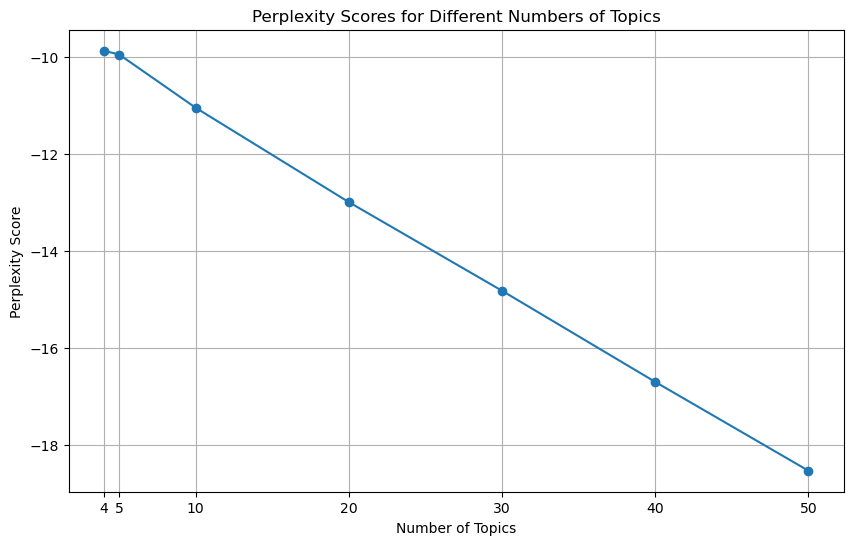

In [181]:
# Plot the perplexity scores for text
plt.figure(figsize=(10, 6))
plt.plot(topics_range, perplexity_scores, marker='o', linestyle='-')
plt.title('Perplexity Scores for Different Numbers of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Perplexity Score')
plt.xticks(topics_range)
plt.grid(True)
plt.show()

In [185]:
lda_model_text=models.ldamodel.LdaModel(text_corpus, id2word=text_dictionary,
                                  num_topics=20, passes=4)

lda_model_text.save('lda_model_text')

text_topics_matrix=np.zeros(shape=(len(text_corpus),n_topics),dtype=float)

## Make the matrix of docs to topic vectors 
for k in range(len(text_corpus)): 
    for topic_id,topic_probability in ldamodel.get_document_topics(text_corpus[k]):
        text_topics_matrix[k,topic_id]=topic_probability

In [200]:
text_topics_matrix.tofile('text_topics_matrix')

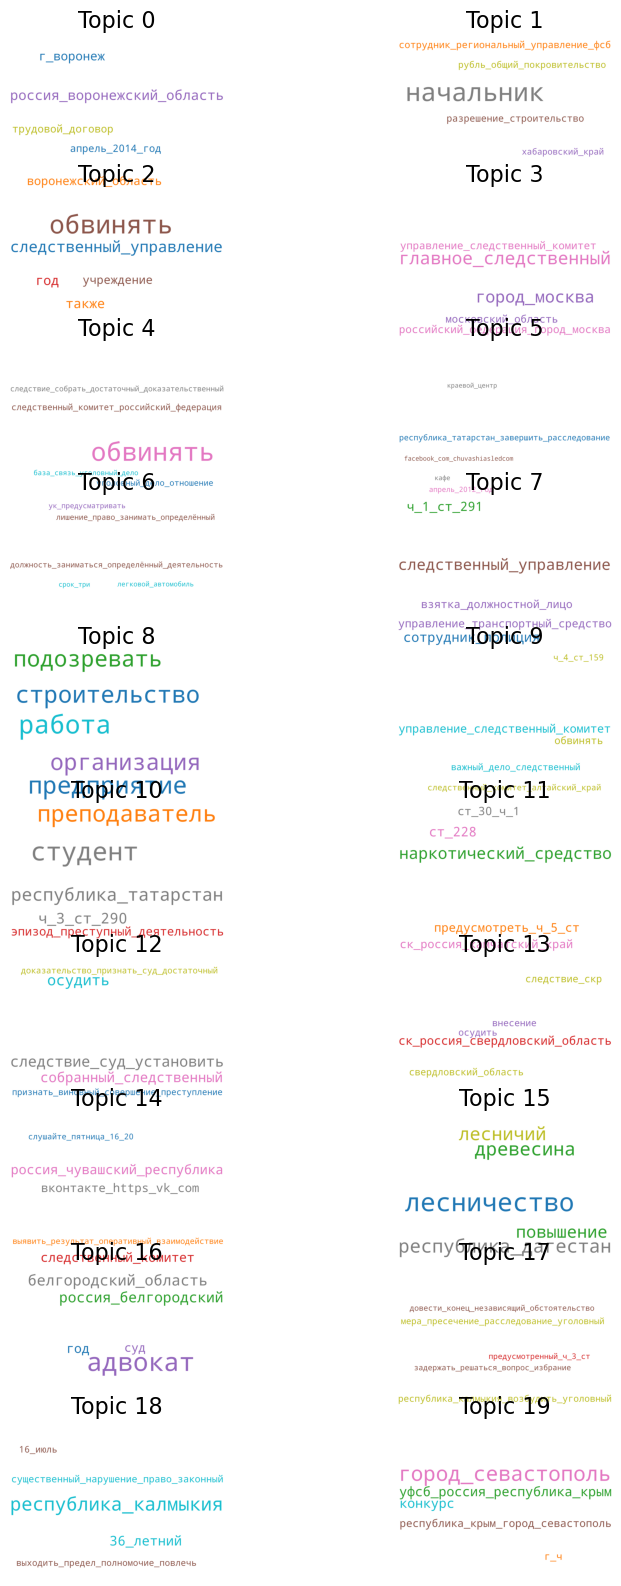

In [196]:
cloud = WordCloud(background_color='white', width=2500, height=1800, max_words=5, colormap='tab10', prefer_horizontal=1.0)
topics = lda_model.show_topics(num_topics=20, num_words=10, formatted=False)

fig, ax = plt.subplots(ncols=2, nrows=10, figsize=(10,20))

for i, ax in enumerate(ax.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.show()

LDA показывает на текущем корпусе текстов неоднозначное деление по темам, в частности из-за того что в корпусе текстов и n-gramm существует множество именованых сущностей. Для выделения тем LDA показывает так же резкую деградацию преплексии. Использовать обученую на корпусе текстов модель LDA для решения задачи классификации представляется менее рациональным, чем попыткой выделения действующих тегов из ключевых слов, тегов и целевых статей. Учитывая проблемы следственных комитетов с маркировкой публикаций, возможно это пойдет им в помощь. 

In [ ]:
Алтернативно исп

In [206]:
d2v_size=5

d2v_corpus= [models.doc2vec.TaggedDocument(text,[k]) for k,text in enumerate(text_lemmas)]
d2v_model=Doc2Vec(vector_size=d2v_size, min_count=1, epochs=10, dm=1)
d2v_model.build_vocab(d2v_corpus)
d2v_model.train(d2v_corpus, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)
d2v_model.save('doc2vec_model')

text_d2v_matrix=np.zeros(shape=(len(text_corpus), d2v_size),dtype=float)
for doc_id in range(len(d2v_corpus)):
    doc2vector=d2v_model.infer_vector(d2v_corpus[doc_id].words)
    text_d2v_matrix[doc_id,:]=doc2vector

In [ ]:
d2v_size=5

d2v_corpus= [models.doc2vec.TaggedDocument(text,[k]) for k,text in enumerate(text_lemmas)]
d2v_model=Doc2Vec(vector_size=d2v_size, min_count=1, epochs=10, dm=1)
d2v_model.build_vocab(d2v_corpus)
d2v_model.train(d2v_corpus, total_examples=d2v_model.corpus_count, epochs=d2v_model.epochs)
d2v_model.save('doc2vec_model')

text_d2v_matrix=np.zeros(shape=(len(text_corpus), d2v_size),dtype=float)
for doc_id in range(len(d2v_corpus)):
    doc2vector=d2v_model.infer_vector(d2v_corpus[doc_id].words)
    text_d2v_matrix[doc_id,:]=doc2vector

title_d2v_matrix.tofile('title_d2v_matrix')

In [207]:
text_d2v_matrix.tofile('text_d2v_matrix')

### 4.3. Преобразование даты в числовой формат

In [213]:
# Регулярное выражение для проверки формата даты
date_pattern = re.compile(r'\d{1,2} [А-Яа-я]+ \d{4}')

# Функция для проверки соответствия формата даты
def check_date_format(date_str):
    return bool(date_pattern.match(date_str))

# Поиск строк с неправильным форматом даты
invalid_dates = result_df[~result_df['Date'].apply(check_date_format)]
invalid_dates

,Link,Topic,Card Title,Tags,Date,Card Text,articles
5625,/news/item/1641777/,irk,В Братске перед судом предстанет депутат Думы,[],Борьба с коррупцией является одним из важнейши...,Следственным отделом по г.Братск СУ СК России ...,"{327, 159}"
5644,/news/item/1632325/,irk,"В Шелехове задержан предприниматель, подозрева...",[],Следственными органами Следственного комитета ...,Следственными органами СУ СК России по Иркутск...,"{290, 291}"
8974,/news/item/1279348/,krk,"Руководитель ГСУ СК по краю Андрей Потапов, ...",['коррупция'],\nСледственными органами Следственного комите...,"Начальник ГУ МВД по краю Александр Речицкий, п...",{}
8982,/news/item/1705823/,krk,В Красноярске начальник управления информацион...,['взятка'],Следственными органами Следственного комитета...,Вторым управлением по расследованию особо важн...,{290}
8984,/news/item/1228728/,krk,В отношении главы Богучанского района возбужде...,[],Следственными органами Следственного комитета ...,В производстве следственных органов Следственн...,{290}
8992,/news/item/1141251/,krk,Об изменении приговора в отношении бывшего ис...,[],Следственными органами Следственного комитета ...,22 сентября 2015 года апелляционная инстанция...,{}
14185,/news/item/1879487/,ГСУ по СКФО,Перед судом предстанет еще один участник прест...,"['взятка,', 'ГСУ СКР по СКФО,', 'незаконный об...",Сегодня,Главным следственным управлением Следственного...,"{290, 210, 222}"
14186,/news/item/1879343/,Московская область,В Московской области оглашен приговор по уголо...,"['коррупция,', 'приговор']",Сегодня,Собранные следователем второго управления по р...,"{290, 291, 159, 228}"


In [215]:
result_df["Date"][5625] = "24 Декабря 2021"
result_df["Date"][5644] = "25 Ноября 2021"
result_df["Date"][8974] = "07 Декабря 2018"
result_df["Date"][8982] = "14 Июля 2022"
result_df["Date"][8984] = "21 Мая 2018"
result_df["Date"][8992] = "22 Сентября 2015"
result_df["Date"][14185] = "02 Мая 2024"
result_df["Date"][14186] = "02 Мая 2024"

In [ ]:
from datetime import datetime

In [ ]:
def convert_to_numeric(date_str):  
    months = {
        "Января": 1, "Февраля": 2, "Марта": 3, "Апреля": 4,
        "Мая": 5, "Июня": 6, "Июля": 7, "Августа": 8,
        "Сентября": 9, "Октября": 10, "Ноября": 11, "Декабря": 12
    }
    parts = date_str.split()
    day = int(parts[0])
    month = months[parts[1]]
    year = int(parts[2])
    return datetime(year, month, day)

result_df['Date'] = result_df['Date'].apply(convert_to_numeric)

In [ ]:
result_df

## 5. Описательный анализ данных


### 5.1. Определение шкалы измерения каждого признака

1. **Link (Ссылка)**:
   - *Тип данных:* Строковый
   - *Свойства:* Строка, представляющая URL адрес новости.

2. **Subject (Субъект)**:
   - *Тип данных:* Строковый
   - *Свойства:* Строка, указывающая субъект в котором опубликована новость.

3. **Tags (Теги)**:
   - *Тип данных:* Список строковых значений
   - *Свойства:* Список строковых значений, представляющих теги, связанные с новостью. Преодставленны из источников.

4. **Date (Дата)**:
   - *Тип данных:* Дата/время
   - *Свойства:* Показывает дату публикации новости.

5. **Articles (Статьи)**:
   - *Тип данных:* Множество целочисленных значений
   - *Свойства:* Статьи УК РФ, связанных с новостью.

6. **Lemmatized Text (Лемматизированный текст)**:
   - *Тип данных:* Список строковых значений
   - *Свойства:* Список строк, содержащих лемматизированный текст новости.

7. **Lemmatized Title (Лемматизированный заголовок)**:
   - *Тип данных:* Список строковых значений
   - *Свойства:* Список строк, содержащих лемматизированный заголовок новости.
   
Стоит вынести еще один признак, для группировки по Федеральным округам.

8. **Region (Округ)**:
   - *Тип данных:* Строковый
   - *Свойства:* Строка, указывающая округ в котором опубликована новость.


### 5.2. Выявление аномальных значений

In [ ]:
import ast

In [ ]:
#Cleaning out the commas
def clean_words_list(words_list):
    cleaned_list = []
    for word in words_list:
        # Split by comma and strip whitespace from each element
        cleaned_words = [w.strip() for w in word.split(',') if w.strip()]
        cleaned_list.extend(cleaned_words)
    return cleaned_list

In [ ]:
result_df['Tags'] = result_df['Tags'].apply(clean_words_list)

Помимо этого необходимо привести к общим значениям теги регионов, которые собирались в принзаком "Topic". В дальнейшем он будет переименован по назначению, но так были выполнены первоначальные записи на сайте СК.

In [ ]:
official_names = {
    'adygheya': 'Республика Адыгея',
    'altai-krai': 'Алтайский край',
    'altai': 'Республика Алтай',
    'astr': 'Астраханская область',
    'buryatia': 'Республика Бурятия',
    'chel': 'Челябинская область',
    'chr': 'Чеченская Республика',
    'chukotka': 'Чукотский автономный округ',
    'chuvashia': 'Чувашская Республика',
    'crim': 'Республика Крым и город Севастополь',
    'dagestan': 'Республика Дагестан',
    'hmao': 'Ханты-Мансийский автономный округ - Югра',
    'ingushetia': 'Республика Ингушетия',
    'irk': 'Иркутская область',
    'ivanovo': 'Ивановская область',
    'kalmykia': 'Республика Калмыкия',
    'kaluga': 'Калужская область',
    'kamchatka': 'Камчатский край',
    'karelia': 'Республика Карелия',
    'kbr': 'Кабардино-Балкарская Республика',
    'kchr': 'Карачаево-Черкесская Республика',
    'khabkray': 'Хабаровский край',
    'kirov': 'Кировская область',
    'kld': 'Калининградская область',
    'komi': 'Республика Коми',
    'kostroma': 'Костромская область',
    'krk': 'Красноярский край и Республика Хакасия',
    'kurgan': 'Курганская область',
    'kursk': 'Курская область',
    'kuzbass': 'Кемеровская область - Кузбасс',
    'lenobl': 'Ленинградская область',
    'lipetsk': 'Липецкая область',
    'magadan': 'Магаданская область',
    'Москова': 'Москва',
    'mordovia': 'Республика Мордовия',
    'Москва': 'Москва',
    'murmansk': 'Мурманская область',
    'nnovgorod': 'Нижегородская область',
    'nsk': 'Новосибирская область',
    'orel': 'Орловская область',
    'oren': 'Оренбургская область',
    'osetia': 'Республика Северная Осетия-Алания',
    'penza': 'Пензенская область',
    'perm': 'Пермский край',
    'primorsky': 'Приморский край',
    'pskov': 'Псковская область',
    'psut': 'Псковская область',
    'noregion': 'Неизвестный регион',
    'Чукотский автономный округ': 'Чукотский АО',
    'rostov':'Ростовская область',
    'ryazan':'Рязанская область', 
    'sakh':'Сахалинская область', 
    'saratov':'Саратовская область', 
    'smolensk':'Смоленская область', 
    'spb':'Санкт-Петербург', 
    'stavropol':'Ставропольский край',
    'surb':'Республика Башкортостан', 
    'sverdlovsk':'Свердловская область', 
    'tambov':'Тамбовская область', 
    'tatarstan':'Республика Татарстан', 
    'tomsk':'Томская область', 
    'tuva':'Республика Тыва',
    'tver':'Тверская область', 
    'tyumen':'Тюменская область', 
    'udm':'Удмуртская Республика', 
    'ulyanovsk':'Ульяновская область', 
    'vladimir':'Владимирская область', 
    'volgograd':'Волгоградская область',
    'voronezh':'Воронежская область', 
    'yanao':'Ямало-Ненецкий АО', 
    'yaroslavl':'Ярославская область', 
    'ykt':'Республика Саха (Якутия)', 
    'zabaykalye':'Забайкальский край',
    'zapsib-sut':'Восточное межрегиональное СУТ', 
    'zmsut':'Западное межрегиональное СУТ'
}

In [ ]:
result_df['Topic'].unique()

In [ ]:
def replace_names(row):
    return official_names.get(row['Topic'], row['Topic'])

In [ ]:
result_df['Topic'] = result_df.apply(replace_names, axis=1)

In [ ]:
result_df = result_df.rename(columns={'Topic': 'Subject'})

In [ ]:
districts = {
    'Центральный': [
        "Белгородская область",    "Брянская область",    "Владимирская область",    "Воронежская область",    "Ивановская область",    "Калужская область",    "Костромская область",
        "Курская область",    "Липецкая область",    "Москва",    "Московская область",    "Орловская область",    "Рязанская область",    "Смоленская область",    "Тамбовская область",
        "Тверская область",    "Тульская область",    "Ярославская область",    "Западное межрегиональное СУТ",    "СО СК РФ на комплексе «Байконур»"
    ],
    'Северо-Западный': [
        "Архангельская область и Ненецкий АО",    "Вологодская область",    "Калининградская область",    "Ленинградская область",    "Мурманская область",    "Новгородская область",
        "Псковская область",    "Республика Карелия",    "Республика Коми",    "Санкт-Петербург"
    ],
    'Южный': [
        "Астраханская область",    "Волгоградская область",    "Краснодарский край",    "Республика Адыгея",    "Республика Калмыкия",    "Ростовская область",    "Республика Крым и город Севастополь"
    ],
    'Северо-Кавказский': [
        "Кабардино-Балкарская Республика",    "Карачаево-Черкесская Республика",    "Республика Дагестан",    "Республика Ингушетия",    "Республика Северная Осетия-Алания",    "Ставропольский край",    "Чеченская Республика"
    ],
    'Приволжский': [
        "Кировская область",    "Нижегородская область",    "Оренбургская область",    "Пензенская область",    "Пермский край",    "Республика Башкортостан",    "Республика Марий Эл",    "Республика Мордовия",    "Республика Татарстан",    "Самарская область",    "Саратовская область",    "Удмуртская Республика",    "Ульяновская область",    "Чувашская Республика",    "Центральное межрегиональное СУТ"    
    ],
    'Уральский': [
        "Курганская область",   "Свердловская область",    "Тюменская область",    "Ханты-Мансийский АО",    "Челябинская область",    "Ямало-Ненецкий АО"
    ],
    'Сибирский': [
        "Алтайский край",    "Иркутская область",    "Кемеровская область - Кузбасс",    "Красноярский край и Республика Хакасия",    "Новосибирская область",    "Омская область",    "Республика Алтай",    "Республика Тыва",    "Томская область",    "Восточное межрегиональное СУТ"
    ],
    'Дальневосточный': [
        "Амурская область",    "Хабаровский край и Еврейская АО",    "Забайкальский край",    "Камчатский край",    "Магаданская область",    "Приморский край",    "Республика Бурятия",    "Республика Саха (Якутия)",    "Сахалинская область",    "Чукотский АО"
    ],
    'Неизвестный': ['Неизвестный регион']
}

def find_district(subject):
    for district, regions in districts.items():
        if subject in regions:
            return district
    return 'Неизвестный регион'

result_df['Region'] = result_df['Subject'].apply(find_district)

In [ ]:
result_df

### 5.3. Визуализация распределения признаков

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Визуализация Subject
plt.figure(figsize=(40, 6))
result_df['Subject'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Subject Distribution')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Визуализация Tags
plt.figure(figsize=(40, 6))
tags = [tag for sublist in result_df['Tags'] for tag in sublist]
tag_counts = pd.Series(tags).value_counts()
tag_counts.plot(kind='bar', color='salmon')
plt.title('Tags Distribution')
plt.xlabel('Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Визуализация Region
plt.figure(figsize=(8, 6))
result_df['Region'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Визуализация Date
plt.figure(figsize=(13, 6))
result_df['Date'].dt.year.value_counts().sort_index().plot(kind='bar', color='lightcoral')
plt.title('Publication Date Distribution')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
article_counts = {}

for articles in result_df['articles']:
    for article in articles:
        if article in article_counts:
            article_counts[article] += 1
        else:
            article_counts[article] = 1

# Сортируем словарь по значениям (количество вхождений статей) в убывающем порядке
sorted_article_counts = dict(sorted(article_counts.items(), key=lambda item: item[1], reverse=True))

# Визуализация Articles
plt.figure(figsize=(40, 6))
plt.bar(sorted_article_counts.keys(), sorted_article_counts.values(), color='lightblue')
plt.title('Articles Distribution')
plt.xlabel('Article')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_doc+title_doc)

# Display the word cloud using matplotlib
plt.figure(figsize=(13, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 5.4. Построение кореллограмм

Единственный временной ряд не связян с на данный момент квантифицируемыми данными. Единственный аналог кореллограммы, который мы можем изучить это связность.

In [19]:
df = pd.read_csv('../PyNotebooks/data_ALL.csv')

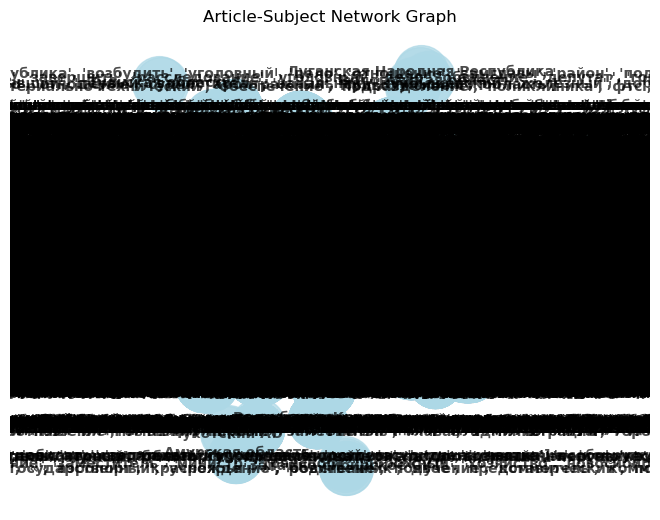

In [29]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes for subjects
subjects = df['Subject'].unique()
for subject in subjects:
    G.add_node(subject)

# Add edges between articles and subjects
for index, row in df.iterrows():
    article = row['Lemmatized Title']
    subject = row['Subject']
    G.add_edge(article, subject)

# Draw the graph
pos = nx.spring_layout(G)  # Set the positions of the nodes
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, font_size=10, font_weight='bold', edge_color='gray', linewidths=1, alpha=0.7)

# Show the graph
plt.title('Article-Subject Network Graph')
plt.show()